In [1]:
#import libraries and dataset
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
data = load_iris()

dataset = pd.DataFrame(data.data, columns = data.feature_names)
dataset['Class'] = data.target
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
#replace class with actual names
target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
dataset['Class'] = dataset['Class'].replace(targets)
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#divide dataset into features and labels
X = dataset.drop(columns=['Class'])
Y = dataset['Class']

In [4]:
#split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
#train decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth =4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

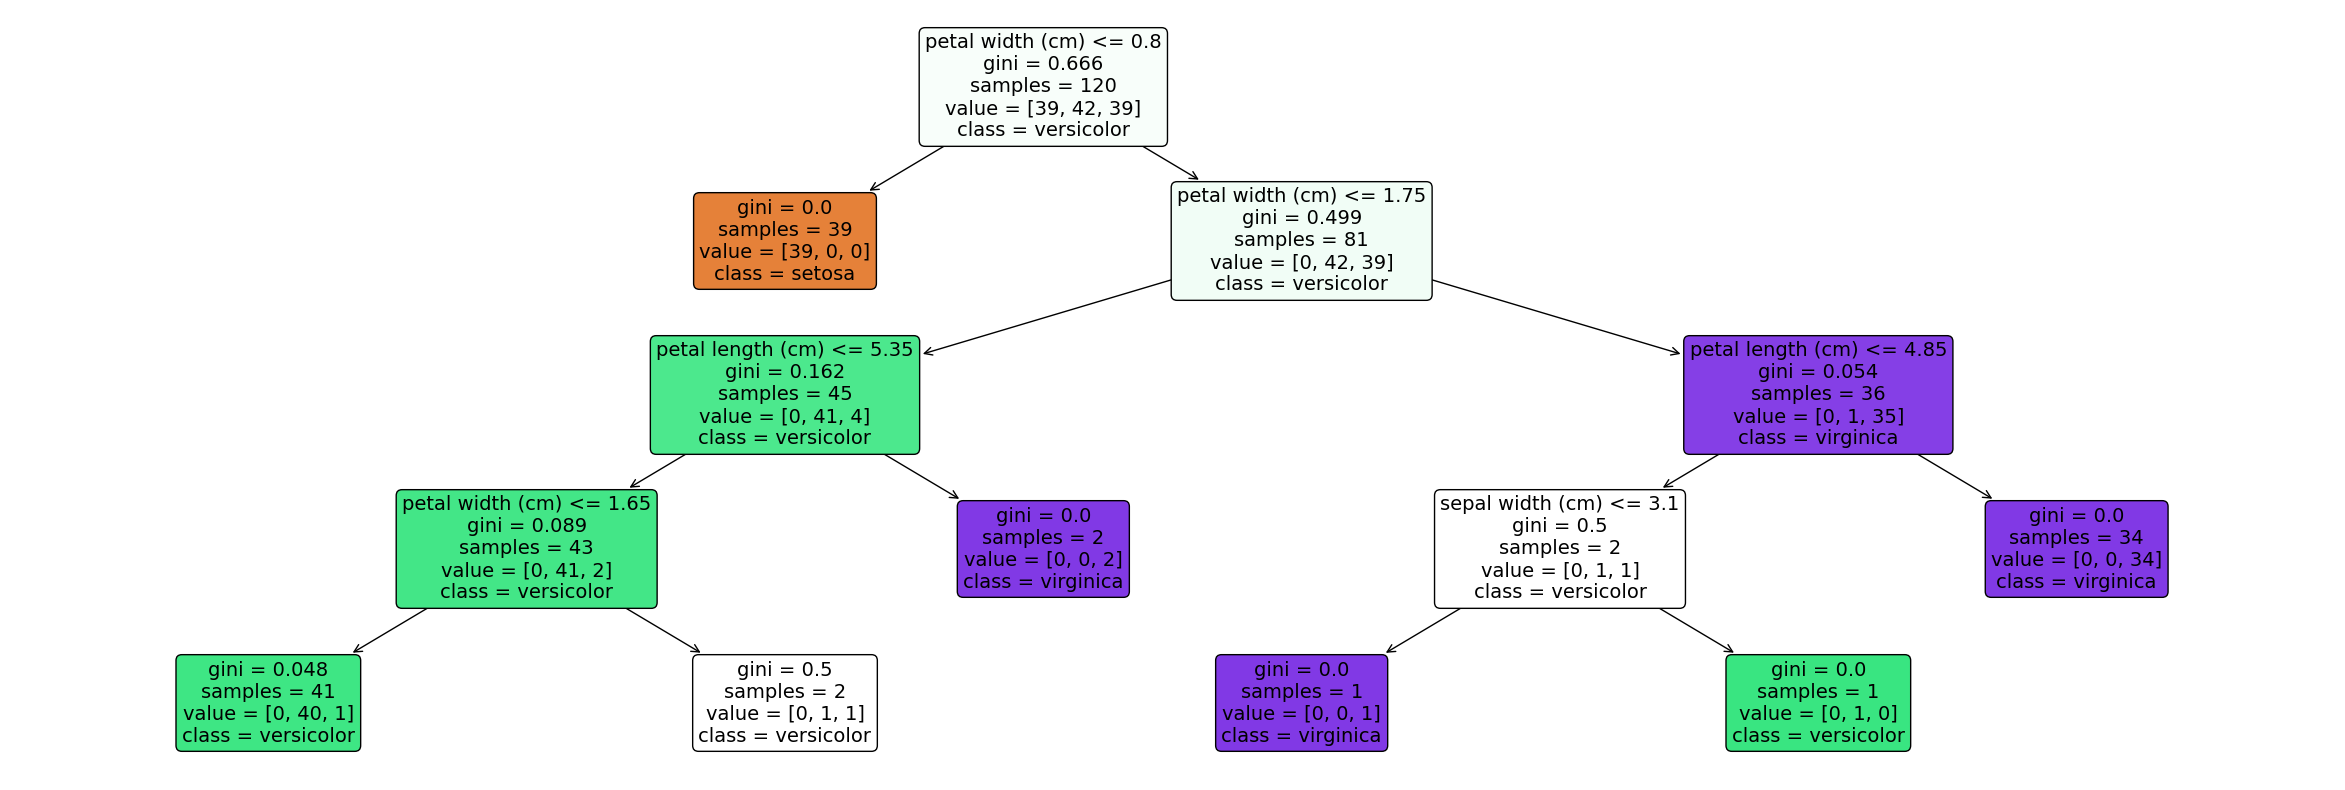

In [6]:
from sklearn import tree
import matplotlib.pyplot as plt

feature_names = X.columns
labels = Y.unique()

plt.figure(figsize=(30,10), facecolor ='white')
a = tree.plot_tree(dt,feature_names = feature_names, class_names = labels, rounded = True, filled = True, fontsize=14)
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))

[[11  0  0]
 [ 0  8  0]
 [ 0  1 10]]
Accuracy : 0.9666666666666667
